# Random Over-sampling
Phương pháp Random over-sampling được thực hiện bằng cách trích xuất ngẫu nhiên các mẫu từ lớp thiểu số cho đến khi chúng đạt được tỷ lệ nhất định so với lớp đa số, thường là 50:50, hay nói cách khác, tỷ lệ cân bằng là 1.

Trong Random over-sampling, chúng ta trích xuất các mẫu từ lớp thiểu số ngẫu nhiên, có thể lấy mẫu có thay thế.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data
Chúng ta sẽ tạo ra 2 lớp, một lớp đa số và một lớp thiểu số, được phân tách rõ ràng để thuận tiện cho việc giải thích.

In [3]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
X.head()

,VarA,VarB
2,0.552261,1.163967
5,1.594624,-0.895783
6,0.471477,0.063861
7,-1.741346,1.001511
8,-2.446263,-2.433344


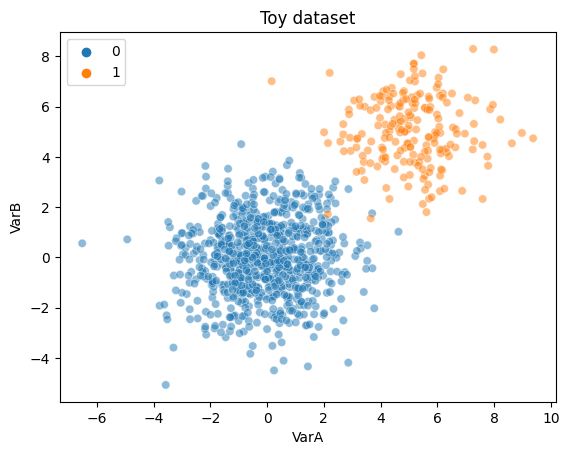

In [5]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Random Over-sampling

[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

Chúng ta sẽ lựa chọn ngẫu nhiên các mẫu từ lớp thiểu số, có thể lấy mẫu có thay thế, cho đến khi chúng ta có số quan sát bằng với số quan sát trong lớp đa số (hoặc bất kỳ tỷ lệ cân bằng nào khác mà chúng ta mong muốn).

In [6]:
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

In [7]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [9]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

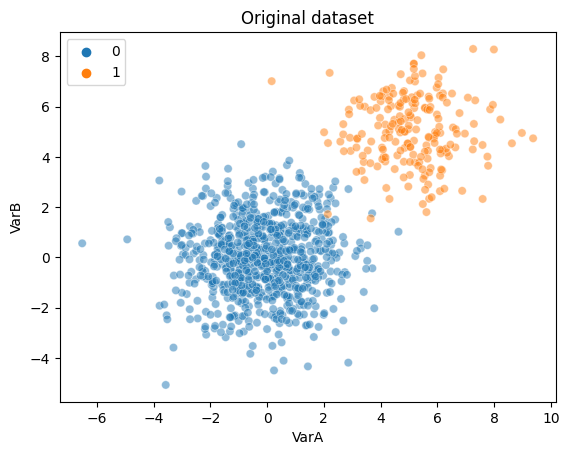

In [10]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

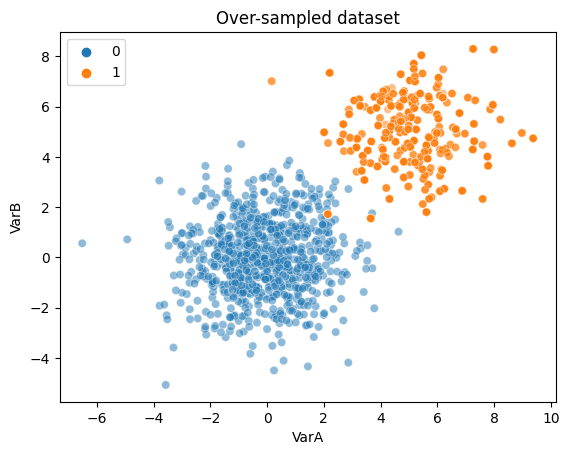

In [11]:
# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

# Multiclass

## Create data

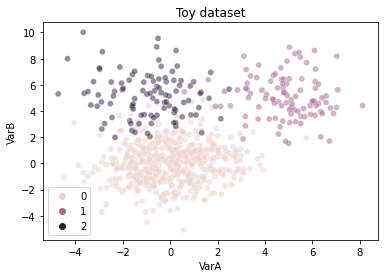

In [11]:
# Create some toy data

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), [-1, 5]]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(100, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [12]:
y.value_counts()

0    534
2    100
1    100
dtype: int64

## Oversampling

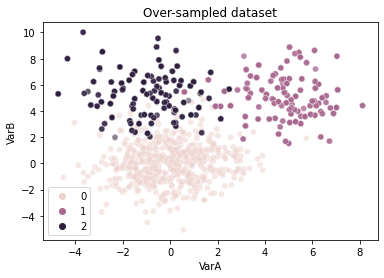

In [13]:
# option 1: oversample all but majority class

ros = RandomOverSampler(
    sampling_strategy='not majority', # samples all but majority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [14]:
y_res.value_counts()

2    534
1    534
0    534
dtype: int64

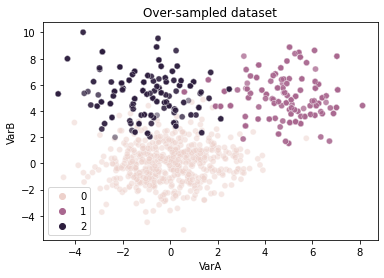

In [15]:
# option 2: specify which classes to oversample

ros = RandomOverSampler(
    sampling_strategy={1:500, 2:500}, # we specify what to oversample
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [16]:
y_res.value_counts()

0    534
2    500
1    500
dtype: int64